In [1]:
from rayleigh_diagnostics import Shell_Spectra
import matplotlib.pyplot as plt
import numpy


In [2]:
ss = Shell_Spectra('27585100')
ss.vals.shape

(22, 22, 19, 10, 100)

In [3]:
ss.nq

lpick = 1
mpick = 1
rind = 15

avar = ss.vals[lpick,mpick,rind,ss.lut[2901],:]
adiff = ss.vals[lpick,mpick,rind,ss.lut[2905],:]

cvar = ss.vals[lpick,mpick,rind,ss.lut[2906],:]
cdiff = ss.vals[lpick,mpick,rind,ss.lut[2910],:]
dt = ss.time[1:]-ss.time[:-1]

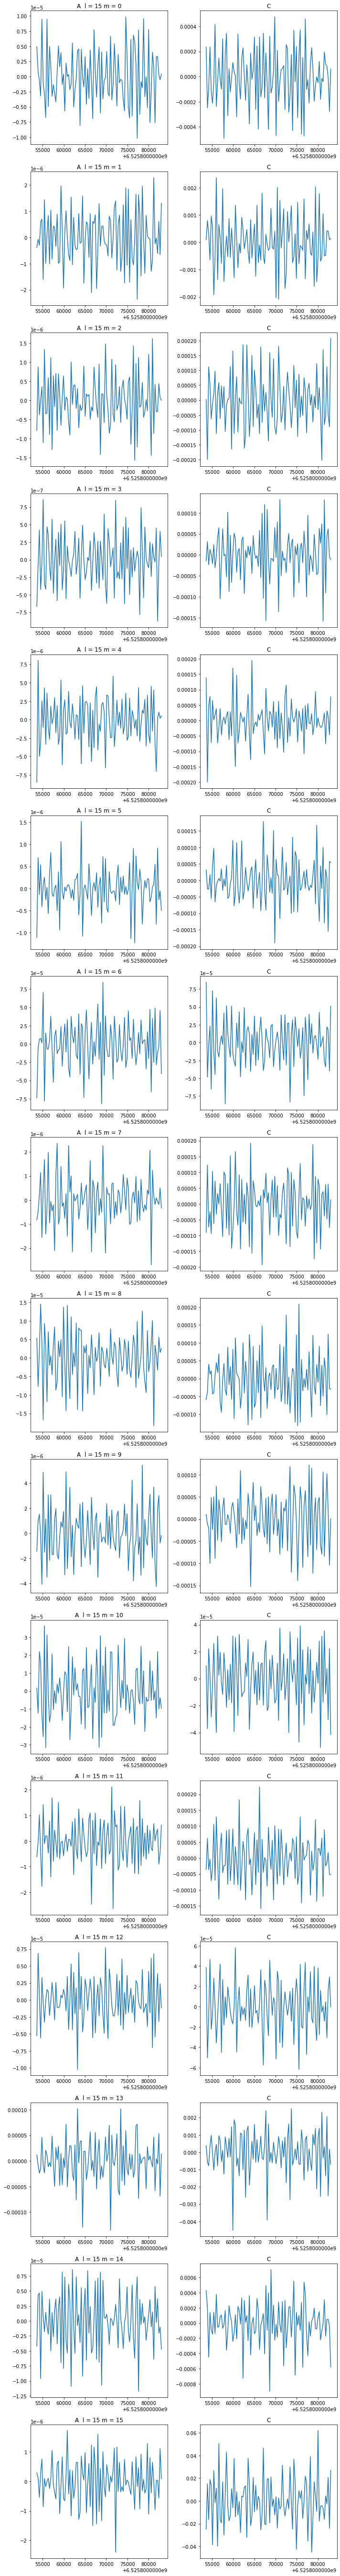

In [4]:
arels =[]
r =4
l = 15
fig, ax = plt.subplots(nrows = l+1, ncols = 2, figsize=(10,5*l))
for r in range(1,2):
        for m in range(l+1):
            avar = ss.vals[l,m,r,ss.lut[2901],:]
            adiff = ss.vals[l,m,r,ss.lut[2905],:]

            cvar = ss.vals[l,m,r,ss.lut[2906],:]
            cdiff = ss.vals[l,m,r,ss.lut[2910],:]
            
            aact = avar[1:] #-avar[:-1]

            ad1 = adiff[1:]
            ad2 = adiff[:-1]
            aexp = avar[:-1]+dt*0.5*(ad1+ad2)

            cact = cvar[1:]
            cd1 = cdiff[1:]
            cd2 = cdiff[:-1]
            cexp = cvar[:-1]+dt*0.5*(cd1+cd2)
            
            arel = (aact.real-aexp.real)/aexp.real
            crel = (cact.real-cexp.real)/cexp.real
            
            arels.append(numpy.max(numpy.abs(arel)))
            
            ax[m][0].plot(ss.time[1:],arel)
            ax[m][0].set_title('A  l = '+str(l)+' m = '+str(m))

            ax[m][1].plot(ss.time[1:],crel)
            ax[m][1].set_title('C')
plt.tight_layout()
plt.show()

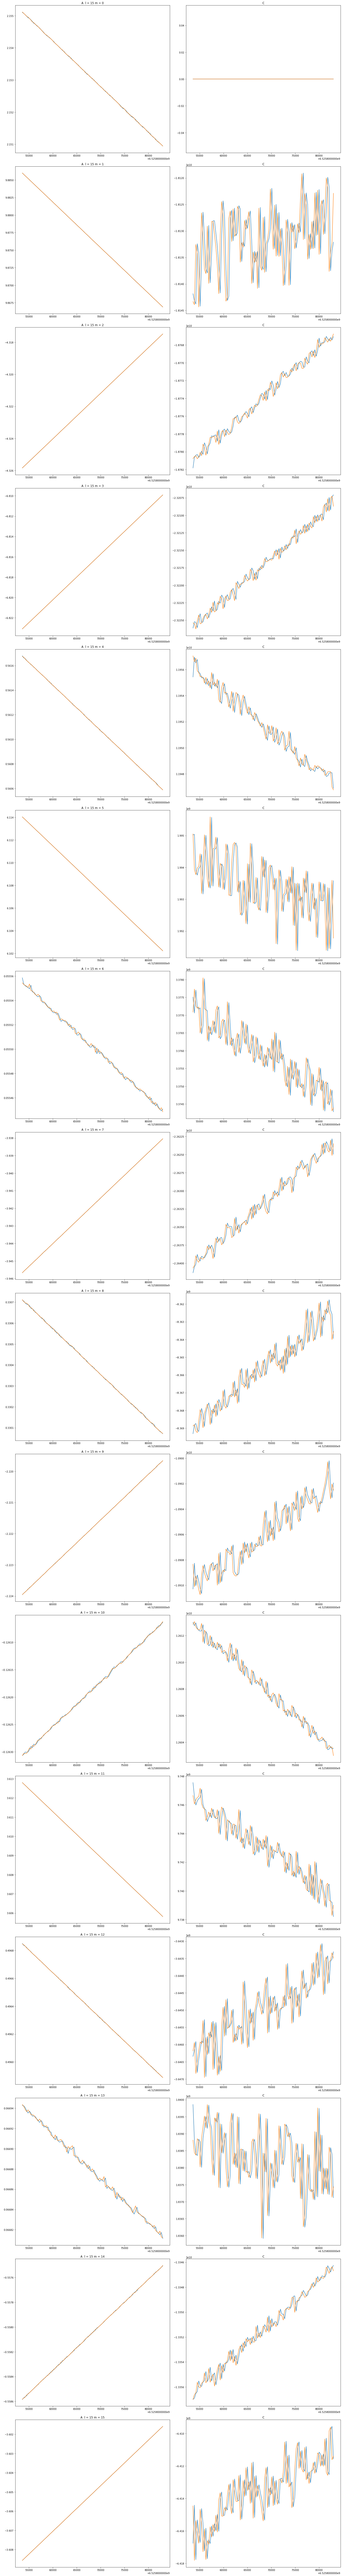

In [7]:
arels =[]
#r =1
#l = 15
fig, ax = plt.subplots(nrows = l+1, ncols = 2, figsize=(20,10*l))

for m in range(l+1):
    avar = ss.vals[l,m,r,ss.lut[2901],:]
    adiff = ss.vals[l,m,r,ss.lut[2905],:]

    cvar = ss.vals[l,m,r,ss.lut[2906],:]
    cdiff = ss.vals[l,m,r,ss.lut[2910],:]

    aact = avar[1:] #-avar[:-1]

    ad1 = adiff[1:]
    ad2 = adiff[:-1]
    aexp = avar[:-1]+dt*0.5*(ad1+ad2)

    cact = cvar[1:]
    #dt = ss.time[1:]-ss.time[:-1]
    cd1 = cdiff[1:]
    cd2 = cdiff[0:-1]
    cexp = cvar[0:-1]+dt*0.5*(cd1+cd2)

    ax[m][0].plot(ss.time[1:],aexp.real)
    ax[m][0].plot(ss.time[1:],aact.real)

    ax[m][0].set_title('A  l = '+str(l)+' m = '+str(m))

    ax[m][1].plot(ss.time[1:],cexp.imag)
    ax[m][1].plot(ss.time[1:],cact.imag)    
    
    #LOREN:  Try swapping the two lines above with the two lines below and look at C...
    
    #ax[m][1].plot(ss.time[:-1],cexp.imag)
    #ax[m][1].plot(ss.time[1:],cact.imag)           
    

    ax[m][1].set_title('C')
plt.tight_layout()
plt.show()

In [ ]:
b = [0,1,2,3]
print(b[:-1])

In [ ]:
cdiff[:-1].shape

In [ ]:
print(dt)

In [ ]:
print(cvar[0]+0.5*dt[0]*(cdiff[0]+cdiff[1]))
#print(cvar[1]-0.5*dt[0]*(cdiff[0]+cdiff[1]))

In [ ]:
print(cvar[0])
print(cvar[1])